In [28]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline

In [29]:
df = pd.read_csv('turnstile_180922.csv')

current_d = datetime.datetime(2018, 9, 22)

In [30]:
#this is for more data
for i in range(0,3):
    #modify the .csv string
    new_date = current_d - datetime.timedelta(days = 7*(i+1))
    url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_' + new_date.strftime('%y%m%d') + '.txt'
    #modify the df name
    dft = pd.read_csv(url)
    dfs = [df, dft]
    df = pd.concat(dfs)

In [31]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,00:00:00,REGULAR,6759219,2291425
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,04:00:00,REGULAR,6759234,2291429
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,08:00:00,REGULAR,6759251,2291453
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,12:00:00,REGULAR,6759330,2291532
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,16:00:00,REGULAR,6759538,2291574


In [32]:
# Cleaning up column names
df.rename(columns=lambda x: x.strip(),inplace='True')

df.rename(columns={'ENTRIES': 'CUMULATIVE_ENTRIES', 'EXITS': 'CUMULATIVE_EXITS'}, inplace=True)

df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE","TIME"], inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE","TIME"], inplace=True)

df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,CUMULATIVE_ENTRIES,CUMULATIVE_EXITS
199101,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,21:00:00,REGULAR,5554,348
199100,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,17:00:00,REGULAR,5554,348
199099,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,13:00:00,REGULAR,5554,348
199098,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,09:00:00,REGULAR,5554,348
199097,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,05:00:00,REGULAR,5554,348


In [33]:
# df3 = df[(df['STATION'] == '59 ST')].copy()

# #Remove times which are not 0h,4h,8h,12h,16h or 20h
# df3 = df3[(df3['TIME'] == '00:00:00') | \
#           (df3['TIME'] == '04:00:00') | \
#           (df3['TIME'] == '08:00:00') | \
#           (df3['TIME'] == '12:00:00') | \
#           (df3['TIME'] == '16:00:00') | \
#           (df3['TIME'] == '20:00:00')].copy()



# df3 = df3.groupby(['DATE','TIME']).sum()

# # Calculating net entries, net exits and net traffic
# df3['NET_ENTRIES'] = df3['CUMULATIVE_ENTRIES'].diff()

# df3['NET_EXITS'] = df3['CUMULATIVE_EXITS'].diff()

# df3['NET_TRAFFIC'] = df3['NET_EXITS'] + df3['NET_ENTRIES']



# # Plot of all SCPs summed for one station
# df3.NET_TRAFFIC.plot()



In [34]:
idx = pd.IndexSlice

In [56]:
#clean data
date = '09/15/2018'
time = '08:00:00'

df4 = df[(df['TIME'] == '00:00:00') | \
          (df['TIME'] == '04:00:00') | \
          (df['TIME'] == '08:00:00') | \
          (df['TIME'] == '12:00:00') | \
          (df['TIME'] == '16:00:00') | \
          (df['TIME'] == '20:00:00')].copy()

df4.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE",'TIME'], inplace=True, ascending=True)

df4['NET_ENTRIES'] = df4['CUMULATIVE_ENTRIES'].diff()

df4['NET_EXITS'] = df4['CUMULATIVE_EXITS'].diff()

df4['NET_TRAFFIC'] = df4['NET_EXITS'] + df4['NET_ENTRIES']



df4 = df4[(df4['NET_ENTRIES'] > 0) & (df4['NET_ENTRIES'] < 10000) & (df4['NET_EXITS'] > 0) & (df4['NET_EXITS'] < 10000)]

df4[(df4.TIME == '00:00:00') & (df4.DATE == '08/25/2018')] = np.nan


df4.dropna(inplace = True)
# sns.boxplot(df4.NET_TRAFFIC)
df_clean = df4
df_clean["DATE_TIME"] = pd.to_datetime(df_clean.DATE + " " + df_clean.TIME, format="%m/%d/%Y %H:%M:%S")
df_clean['DAY'] = df_clean['DATE_TIME'].apply(lambda x:x.weekday())

df_clean


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,CUMULATIVE_ENTRIES,CUMULATIVE_EXITS,NET_ENTRIES,NET_EXITS,NET_TRAFFIC,DATE_TIME,DAY
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087.0,2283188.0,20.0,4.0,24.0,2018-08-25 04:00:00,5
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105.0,2283229.0,18.0,41.0,59.0,2018-08-25 08:00:00,5
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180.0,2283314.0,75.0,85.0,160.0,2018-08-25 12:00:00,5
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349.0,2283384.0,169.0,70.0,239.0,2018-08-25 16:00:00,5
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,20:00:00,REGULAR,6736562.0,2283425.0,213.0,41.0,254.0,2018-08-25 20:00:00,5
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/26/2018,00:00:00,REGULAR,6736683.0,2283460.0,121.0,35.0,156.0,2018-08-26 00:00:00,6
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/26/2018,04:00:00,REGULAR,6736696.0,2283461.0,13.0,1.0,14.0,2018-08-26 04:00:00,6
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/26/2018,08:00:00,REGULAR,6736705.0,2283483.0,9.0,22.0,31.0,2018-08-26 08:00:00,6
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/26/2018,12:00:00,REGULAR,6736746.0,2283524.0,41.0,41.0,82.0,2018-08-26 12:00:00,6
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/26/2018,16:00:00,REGULAR,6736873.0,2283587.0,127.0,63.0,190.0,2018-08-26 16:00:00,6


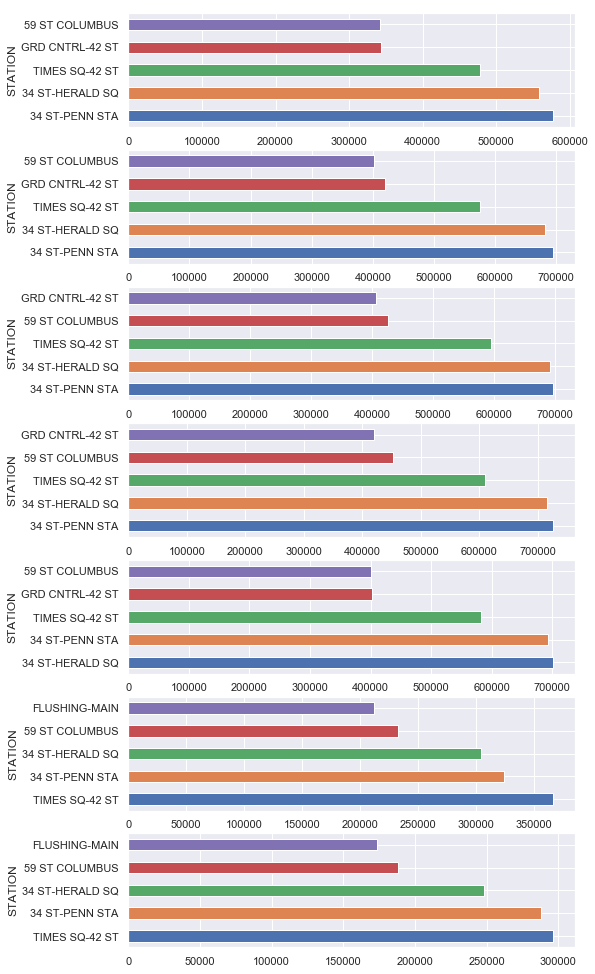

In [67]:
#Add all 8-8 shifts for each day to see which station to send street team
df_worktime = df_clean[(df_clean.TIME == '12:00:00') | \
                       (df_clean.TIME == '16:00:00') | \
                       (df_clean.TIME == '20:00:00')]

days = range(0,7)
df_days_shifts = []

for day in days:
    df_single_day = df_worktime[df_worktime.DAY == day]
    df_single_day = df_single_day.groupby('STATION').sum().sort_values('NET_TRAFFIC', ascending = False).head()
    df_days_shifts.append(df_single_day)
    
for i, day in enumerate(df_days_shifts):
    plt.subplot(len(dates),1,i+1)
    day.NET_TRAFFIC.plot(kind = 'barh', figsize = [8,70])

In [49]:
# finding the top 10 stations overall
df_clean.groupby(['STATION','DATE','TIME']).sum().sort_values('NET_TRAFFIC', ascending = False).head()

CUMULATIVE_ENTRIES  CUMULATIVE_EXITS  \
STATION         DATE       TIME                                             
34 ST-PENN STA  09/12/2018 20:00:00        1.657900e+09      1.705863e+09   
34 ST-HERALD SQ 09/20/2018 20:00:00        1.550889e+09      1.354093e+09   
34 ST-PENN STA  09/20/2018 20:00:00        1.658734e+09      1.706648e+09   
34 ST-HERALD SQ 09/21/2018 20:00:00        1.550998e+09      1.354198e+09   
                09/14/2018 20:00:00        1.550341e+09      1.353608e+09   

                                     NET_ENTRIES  NET_EXITS  NET_TRAFFIC  
STATION         DATE       TIME                                           
34 ST-PENN STA  09/12/2018 20:00:00      35881.0    49408.0      85289.0  
34 ST-HERALD SQ 09/20/2018 20:00:00      51379.0    33478.0      84857.0  
34 ST-PENN STA  09/20/2018 20:00:00      34957.0    48973.0      83930.0  
34 ST-HERALD SQ 09/21/2018 20:00:00      48354.0    33773.0      82127.0  
                09/14/2018 20:00:00      48369.0    33542.0      81911.0

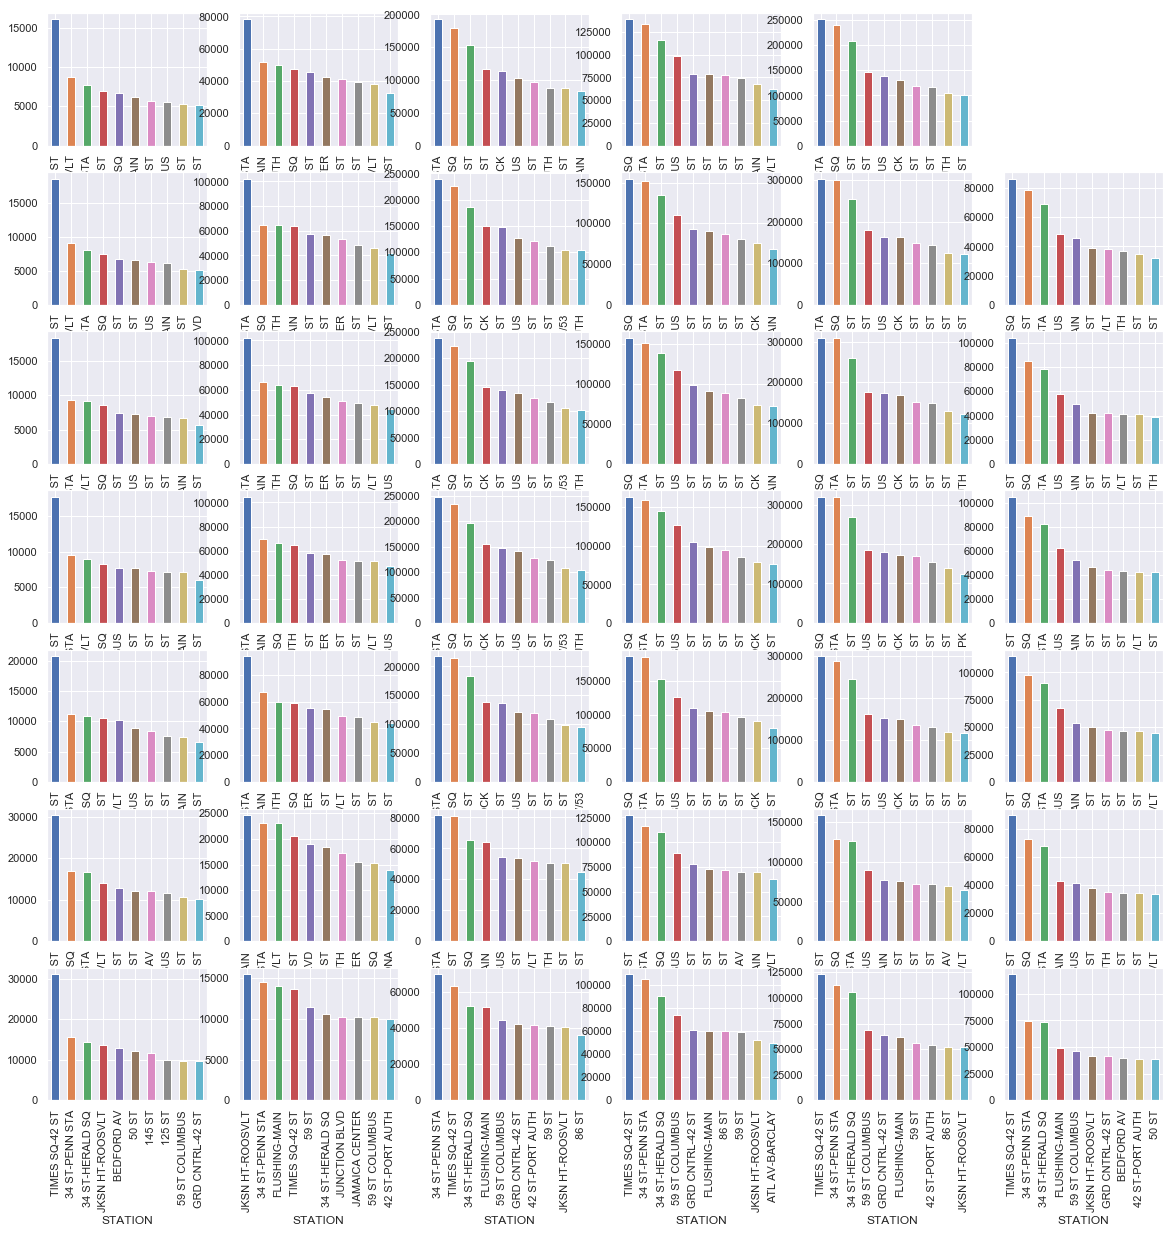

In [58]:
#find all stations in one specific time

date_list = list(df_clean.DATE.unique())
time_list = list(df_clean.TIME.unique())
day_list = range(0,7)

all_shifts_series = []
all_shifts_df = []

#constructs list that contains pd series that contains the top 10 busiest stations for each datetime
#made list that contains other columns but same rows and groupby
# for date in date_list:
#     for time in time_list:
#             df_one = df4[(df4.DATE == date) & (df4.TIME == time)]
#             df_one = df_one.groupby('STATION').sum().sort_values('NET_TRAFFIC', ascending = False)
#             df_one = df_one#.head(10)
#             all_shifts_df.append(df_one)
#             df_two = df_one.NET_TRAFFIC
#             all_shifts_series.append(df_two)

# list of 12 hour period traffic for each day   
for day in day_list:
    for time in time_list:
            df_one = df_clean[(df_clean.DAY == day) & (df_clean.TIME == time)]
            df_one = df_one.groupby('STATION').sum().sort_values('NET_TRAFFIC', ascending = False)
            df_one = df_one.head(10)
            all_shifts_df.append(df_one)
            df_two = df_one.NET_TRAFFIC
            all_shifts_series.append(df_two)
            
#plots all days and shifts

for n_day in range(0,len(day_list)):
    for n_time in range (0,6):
        plot_num = n_day*6 + n_time + 1
        if plot_num == 6:
            break
        plt.subplot(7, 6, plot_num)
        all_shifts_df[plot_num - 1].NET_TRAFFIC.plot(kind = 'bar', figsize = [20,20])

# plt.subplot(7,6,7)
# all_shifts_df[6].NET_TRAFFIC.plot(kind = 'bar', figsize = [20,20])

# only plot shifts on Friday

# for i in range(0,6):
#     plt.subplot(6,1,i+1)
#     all_shifts_df[36 + i].NET_TRAFFIC.plot(kind = 'barh', figsize = [10,15])


    


become master of plotting stuff